# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [148]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [149]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [150]:
# Copying the columns that will be used in a new variable.
sinasc_1 = sinasc_raw[['munResNome', 'IDADEMAE', 'IDADEPAI']].copy()
sinasc_1

,munResNome,IDADEMAE,IDADEPAI
0,Alta Floresta D'Oeste,19,26.0
1,Alta Floresta D'Oeste,29,24.0
2,Alta Floresta D'Oeste,37,32.0
3,Alto Alegre dos Parecis,30,24.0
4,Alta Floresta D'Oeste,30,27.0
...,...,...,...
27023,Vilhena,32,35.0
27024,Chupinguaia,19,NaN
27025,Vilhena,24,30.0
27026,Vilhena,21,24.0


In [151]:
sinasc_1.groupby('munResNome').mean().sort_values(by='IDADEMAE', ascending=True)

,IDADEMAE,IDADEPAI
munResNome,,
Município ignorado - RO,24.000000,22.000000
Governador Jorge Teixeira,24.401786,29.222222
Costa Marques,24.412017,30.613636
Cujubim,24.482927,31.400000
Corumbiara,24.716535,32.470588
Campo Novo de Rondônia,24.825301,30.500000
Alto Alegre dos Parecis,24.844156,29.179104
Seringueiras,24.910714,30.500000
Alto Paraíso,24.960177,28.833333


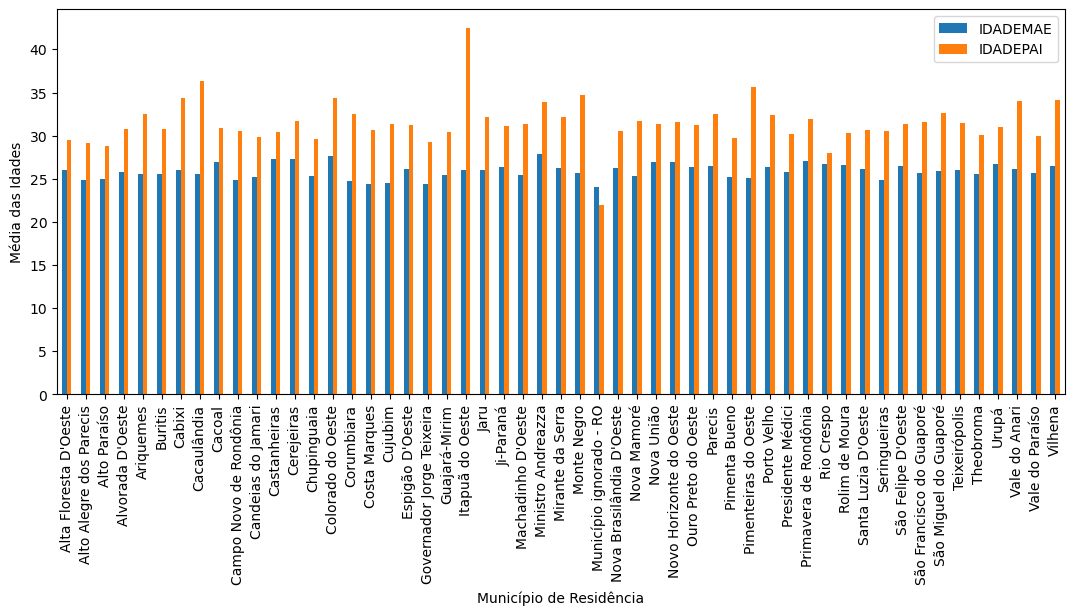

In [152]:
media_por_municipio = sinasc_1.groupby('munResNome').mean()

ax = media_por_municipio.plot(figsize=[13, 5], kind='bar')

# Set tick positions on the x-axis
ax.set_xticks(range(len(media_por_municipio.index)))

# Set tick labels on the x-axis
ax.set_xticklabels(media_por_municipio.index)

# Rotate x-axis labels by 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Add a title for the x-axis
ax.set_xlabel('Município de Residência')

# Add a title for the y-axis
ax.set_ylabel('Média das Idades')

# View 
plt.show()


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [153]:
# Copying the columns that will be used into a new variable. Filtering the correct age.
sinasc_2 = sinasc_raw[['PESO', 'SEXO', 'ESCMAE', 'DTNASC']].copy()
filtro_idade = sinasc_2[sinasc_2['DTNASC'] == '2019-10-10']
filtro_idade = filtro_idade.drop('DTNASC', axis = 1)

filtro_idade_mean = filtro_idade.groupby(['ESCMAE', 'SEXO']).mean().unstack()

ordem_categorias = ['4 a 7 anos', '8 a 11 anos', '12 anos ou mais']
filtro_idade_mean = filtro_idade_mean.loc[ordem_categorias]
filtro_idade_mean

PESO             
SEXO                Feminino    Masculino
ESCMAE                                   
4 a 7 anos       3039.923077  3181.000000
8 a 11 anos      3037.333333  3414.388889
12 anos ou mais  3207.400000  3555.500000

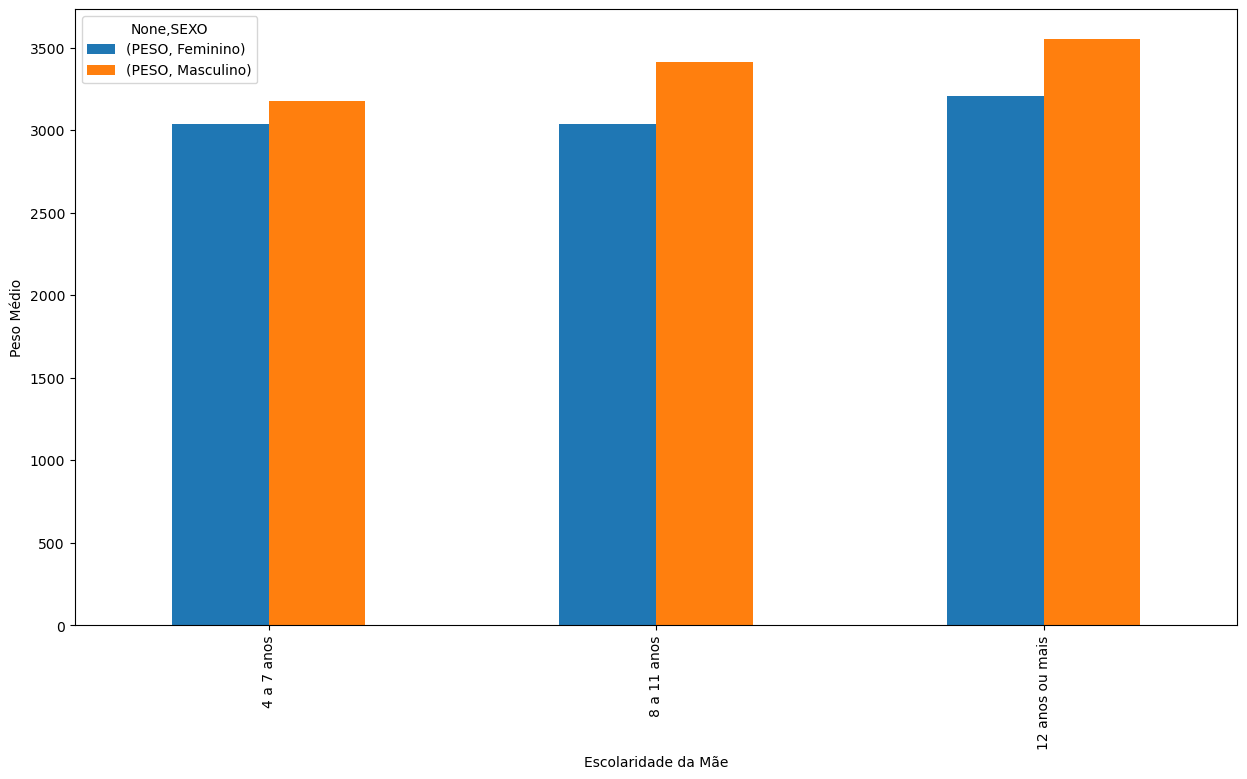

In [154]:
ax = filtro_idade_mean.plot(figsize=[15, 8], kind='bar')

plt.ylabel('Peso Médio')
plt.xlabel('Escolaridade da Mãe')
plt.show()


### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [155]:
# Copying the columns that will be used into a new variable.
sinasc_3 = sinasc_raw[['munResNome', 'DTNASC', 'IDADEMAE', 'IDADEPAI']].copy()


In [156]:
# Qual o municipio que nasceu menos bebe em 2019?
muni_nascidos = sinasc_3.groupby('munResNome')['DTNASC'].count().to_frame().sort_values(by='DTNASC', ascending=True)
muni_nascidos

,DTNASC
munResNome,
Município ignorado - RO,1
Castanheiras,32
Pimenteiras do Oeste,40
Primavera de Rondônia,43
Parecis,44
Rio Crespo,50
São Felipe D'Oeste,54
Teixeirópolis,64
Cacaulândia,75


In [157]:
# Qual a idade media, maxima, minima das maes nesse municipio?
idades_maes = sinasc_3.groupby('munResNome')
maes_mun = idades_maes.agg({'DTNASC': 'count', 'IDADEMAE':['mean','max','min']}).sort_values(('DTNASC', 'count'), ascending=True)
maes_mun

DTNASC   IDADEMAE        
                           count       mean max min
munResNome                                         
Município ignorado - RO        1  24.000000  24  24
Castanheiras                  32  27.281250  39  17
Pimenteiras do Oeste          40  25.075000  40  14
Primavera de Rondônia         43  27.023256  39  16
Parecis                       44  26.454545  41  16
Rio Crespo                    50  26.660000  39  16
São Felipe D'Oeste            54  26.481481  41  17
Teixeirópolis                 64  26.031250  39  16
Cacaulândia                   75  25.546667  42  16
Cabixi                        80  26.037500  39  13
Vale do Paraíso               81  25.679012  52  14
Ministro Andreazza            84  27.904762  44  17
Vale do Anari                 93  26.096774  44  14
Theobroma                     97  25.536082  42  15
Novo Horizonte do Oeste       98  26.938776  41  15
Santa Luzia D'Oeste           99  26.121212  41  15
Nova União                   104  26.894231  39  16
Itapuã do Oeste              109  26.064220  46  15
Governador Jorge Teixeira    112  24.401786  41  13
Corumbiara                   127  24.716535  43  15
Alto Alegre dos Parecis      154  24.844156  41  14
Chupinguaia                  162  25.333333  42  13
Mirante da Serra             164  26.304878  46  14
Campo Novo de Rondônia       166  24.825301  40  13
Seringueiras                 168  24.910714  42  14
Urupá                        170  26.688235  43  15
Monte Negro                  199  25.648241  40  14
Cujubim                      205  24.482927  42  14
Alvorada D'Oeste             205  25.770732  44  15
Colorado do Oeste            214  27.602804  47  15
Alto Paraíso                 226  24.960177  42  11
Costa Marques                233  24.412017  41  12
Cerejeiras                   237  27.240506  53  15
Nova Brasilândia D'Oeste     261  26.222222  51  15
São Francisco do Guaporé     303  25.660066  41  14
Presidente Médici            304  25.796053  44  14
Candeias do Jamari           337  25.243323  45  14
São Miguel do Guaporé        353  25.926346  42  14
Alta Floresta D'Oeste        367  25.991826  53  14
Nova Mamoré                  432  25.326389  46  14
Espigão D'Oeste              450  26.093333  44  14
Machadinho D'Oeste           500  25.480000  44  13
Buritis                      583  25.559177  44  14
Pimenta Bueno                616  25.199675  47  13
Ouro Preto do Oeste          631  26.375594  44  14
Guajará-Mirim                781  25.462228  43  13
Jaru                         881  25.982974  45  12
Rolim de Moura               927  26.600863  44  14
Cacoal                      1374  26.890102  47  14
Vilhena                     1590  26.433962  46  14
Ariquemes                   1729  25.607866  44  13
Ji-Paraná                   2182  26.361137  44  12
Porto Velho                 8437  26.312670  47  12

In [158]:
mun_RO_maes = maes_mun.loc[maes_mun.index[0]].to_frame()
mun_RO_maes

Município ignorado - RO
DTNASC   count                      1.0
IDADEMAE mean                      24.0
         max                       24.0
         min                       24.0

In [159]:
# Qual a idade media, maxima, minima dos pais nesse municipio?
idades_pais = sinasc_3.groupby('munResNome')
pais_mun = idades_pais.agg({'DTNASC': 'count', 'IDADEPAI':['mean','max','min']}).sort_values(('DTNASC', 'count'), ascending=True)
pais_mun

DTNASC   IDADEPAI            
                           count       mean   max   min
munResNome                                             
Município ignorado - RO        1  22.000000  22.0  22.0
Castanheiras                  32  30.392857  43.0  17.0
Pimenteiras do Oeste          40  35.600000  45.0  25.0
Primavera de Rondônia         43  31.888889  44.0  21.0
Parecis                       44  32.473684  61.0  18.0
Rio Crespo                    50  28.000000  28.0  28.0
São Felipe D'Oeste            54  31.395833  57.0  18.0
Teixeirópolis                 64  31.500000  67.0  20.0
Cacaulândia                   75  36.333333  50.0  28.0
Cabixi                        80  34.333333  47.0  19.0
Vale do Paraíso               81  29.976744  51.0  18.0
Ministro Andreazza            84  33.849315  55.0  21.0
Vale do Anari                 93  34.000000  58.0  23.0
Theobroma                     97  30.083333  45.0  23.0
Novo Horizonte do Oeste       98  31.588235  56.0  20.0
Santa Luzia D'Oeste           99  30.703297  53.0  18.0
Nova União                   104  31.371429  53.0  18.0
Itapuã do Oeste              109  42.500000  73.0  25.0
Governador Jorge Teixeira    112  29.222222  37.0  22.0
Corumbiara                   127  32.470588  52.0  21.0
Alto Alegre dos Parecis      154  29.179104  50.0  16.0
Chupinguaia                  162  29.629630  46.0  20.0
Mirante da Serra             164  32.154762  56.0  20.0
Campo Novo de Rondônia       166  30.500000  40.0  21.0
Seringueiras                 168  30.500000  47.0  20.0
Urupá                        170  31.008929  48.0  17.0
Monte Negro                  199  34.678571  55.0  20.0
Cujubim                      205  31.400000  44.0  19.0
Alvorada D'Oeste             205  30.757282  52.0  17.0
Colorado do Oeste            214  34.354839  53.0  23.0
Alto Paraíso                 226  28.833333  49.0  21.0
Costa Marques                233  30.613636  60.0  17.0
Cerejeiras                   237  31.652778  52.0  19.0
Nova Brasilândia D'Oeste     261  30.520833  48.0  20.0
São Francisco do Guaporé     303  31.638889  54.0  19.0
Presidente Médici            304  30.150754  64.0  16.0
Candeias do Jamari           337  29.894737  41.0  21.0
São Miguel do Guaporé        353  32.666667  60.0  19.0
Alta Floresta D'Oeste        367  29.548701  58.0  17.0
Nova Mamoré                  432  31.692308  43.0  19.0
Espigão D'Oeste              450  31.198113  86.0  16.0
Machadinho D'Oeste           500  31.326923  53.0  17.0
Buritis                      583  30.812500  49.0  18.0
Pimenta Bueno                616  29.745174  70.0  16.0
Ouro Preto do Oeste          631  31.233244  60.0  17.0
Guajará-Mirim                781  30.470588  44.0  19.0
Jaru                         881  32.197183  62.0  19.0
Rolim de Moura               927  30.360479  69.0  16.0
Cacoal                      1374  30.931854  66.0  17.0
Vilhena                     1590  34.152941  60.0  18.0
Ariquemes                   1729  32.466667  51.0  20.0
Ji-Paraná                   2182  31.132239  63.0  15.0
Porto Velho                 8437  32.352679  65.0  16.0

In [160]:
mun_RO_pais = pais_mun.loc[pais_mun.index[0]].to_frame()
mun_RO_pais

Município ignorado - RO
DTNASC   count                      1.0
IDADEPAI mean                      22.0
         max                       22.0
         min                       22.0

In [161]:
df = pd.concat([mun_RO_maes, mun_RO_pais], axis=1)
df

Município ignorado - RO  Município ignorado - RO
DTNASC   count                      1.0                      1.0
IDADEMAE mean                      24.0                      NaN
         max                       24.0                      NaN
         min                       24.0                      NaN
IDADEPAI mean                       NaN                     22.0
         max                        NaN                     22.0
         min                        NaN                     22.0

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [162]:
# Copying the columns that will be used into a new variable.
sinasc_4 = sinasc_raw[['munResNome', 'DTNASC', 'IDADEMAE', 'IDADEPAI', 'QTDFILVIVO']].copy()

# Converting the column 'DTNASC' to datetime type.
sinasc_4['DTNASC'] = pd.to_datetime(sinasc_4['DTNASC'])
sinasc_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   munResNome  27028 non-null  object        
 1   DTNASC      27028 non-null  datetime64[ns]
 2   IDADEMAE    27028 non-null  int64         
 3   IDADEPAI    7607 non-null   float64       
 4   QTDFILVIVO  25455 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 1.0+ MB


In [163]:
# Qual o municipio que nasceu mais bebe no mês de março?

# Filtering the correct month
datas_marco = sinasc_4[sinasc_4['DTNASC'].dt.month == 3]

nasc_mun = datas_marco.groupby('munResNome')['DTNASC'].count().to_frame().sort_values(by='DTNASC', ascending=False)
nasc_mun

,DTNASC
munResNome,
Porto Velho,744
Ji-Paraná,188
Vilhena,148
Ariquemes,141
Cacoal,133
Jaru,80
Guajará-Mirim,75
Rolim de Moura,69
Ouro Preto do Oeste,67


In [164]:
# Qual a quantidade de filhos vivos media, maxima, minima nesse municipio?

agrup_vivos = datas_marco.groupby('munResNome')
filhos_vivos = agrup_vivos.agg({'DTNASC': 'count', 'QTDFILVIVO':['mean','max','min']}).sort_values(('DTNASC', 'count'), ascending=False)
filhos_vivos


DTNASC QTDFILVIVO          
                           count       mean  max  min
munResNome                                           
Porto Velho                  744   1.295056  9.0  0.0
Ji-Paraná                    188   0.828877  4.0  0.0
Vilhena                      148   0.979592  5.0  0.0
Ariquemes                    141   1.064748  4.0  0.0
Cacoal                       133   0.969697  7.0  0.0
Jaru                          80   1.025641  5.0  0.0
Guajará-Mirim                 75   1.534247  8.0  0.0
Rolim de Moura                69   0.724638  5.0  0.0
Ouro Preto do Oeste           67   1.014925  5.0  0.0
Pimenta Bueno                 62   0.836066  4.0  0.0
Buritis                       59   1.421053  4.0  0.0
Nova Mamoré                   53   1.360000  6.0  0.0
Espigão D'Oeste               44   1.386364  6.0  0.0
Machadinho D'Oeste            44   1.000000  6.0  0.0
São Miguel do Guaporé         41   1.000000  4.0  0.0
Candeias do Jamari            33   1.250000  4.0  0.0
São Francisco do Guaporé      31   1.161290  6.0  0.0
Alta Floresta D'Oeste         31   0.903226  4.0  0.0
Presidente Médici             29   0.724138  3.0  0.0
Costa Marques                 24   1.208333  4.0  0.0
Alvorada D'Oeste              22   1.000000  3.0  0.0
Alto Paraíso                  22   1.285714  3.0  0.0
Monte Negro                   20   0.700000  3.0  0.0
Nova Brasilândia D'Oeste      20   0.947368  3.0  0.0
Colorado do Oeste             19   1.000000  4.0  0.0
Seringueiras                  19   1.000000  2.0  0.0
Chupinguaia                   18   1.055556  4.0  0.0
Cujubim                       17   1.294118  5.0  0.0
Cerejeiras                    16   0.875000  2.0  0.0
Urupá                         14   0.928571  2.0  0.0
Vale do Paraíso               13   0.583333  2.0  0.0
Campo Novo de Rondônia        13   1.285714  2.0  0.0
Corumbiara                    12   0.909091  3.0  0.0
Vale do Anari                 11   0.818182  2.0  0.0
Alto Alegre dos Parecis       10   0.888889  2.0  0.0
Governador Jorge Teixeira     10   0.555556  2.0  0.0
Cacaulândia                   10   1.200000  4.0  0.0
Rio Crespo                     9   1.000000  3.0  0.0
Mirante da Serra               9   1.000000  2.0  0.0
Theobroma                      8   1.125000  2.0  0.0
Itapuã do Oeste                8   1.285714  3.0  0.0
Santa Luzia D'Oeste            7   0.428571  2.0  0.0
Nova União                     7   0.571429  1.0  0.0
Cabixi                         6   0.833333  3.0  0.0
Parecis                        6   1.833333  5.0  1.0
Ministro Andreazza             6   1.166667  3.0  0.0
Pimenteiras do Oeste           6   1.000000  2.0  0.0
Primavera de Rondônia          5   1.200000  2.0  0.0
São Felipe D'Oeste             5   0.000000  0.0  0.0
Novo Horizonte do Oeste        5   1.200000  2.0  1.0
Castanheiras                   4   1.750000  3.0  1.0
Teixeirópolis                  3   0.333333  1.0  0.0

In [165]:
filhos_vivos_porto_velho = filhos_vivos.iloc[0:1] 
filhos_vivos_porto_velho

DTNASC QTDFILVIVO          
             count       mean  max  min
munResNome                             
Porto Velho    744   1.295056  9.0  0.0

In [166]:
# Qual a idade media, maxima, minima dos pais nesse municipio?
agrup_idade = datas_marco.groupby('munResNome')
valores_idade = agrup_vivos.agg({'DTNASC': 'count', 'IDADEMAE':['mean','max','min'], 'IDADEPAI':['mean','max','min']}).sort_values(('DTNASC', 'count'), ascending=False)
valores_idade

DTNASC   IDADEMAE           IDADEPAI            
                           count       mean max min       mean   max   min
munResNome                                                                
Porto Velho                  744  26.596774  44  14  34.629032  62.0  19.0
Ji-Paraná                    188  25.377660  44  13  30.831579  56.0  16.0
Vilhena                      148  26.412162  39  16  33.562500  47.0  27.0
Ariquemes                    141  25.304965  42  14  28.666667  29.0  28.0
Cacoal                       133  26.466165  40  15  30.008197  47.0  17.0
Jaru                          80  26.550000  40  14  33.500000  41.0  21.0
Guajará-Mirim                 75  26.333333  43  14  34.500000  43.0  26.0
Rolim de Moura                69  27.594203  41  18  31.257576  50.0  19.0
Ouro Preto do Oeste           67  25.522388  44  14  30.175000  57.0  19.0
Pimenta Bueno                 62  25.177419  39  14  29.611111  49.0  17.0
Buritis                       59  25.406780  42  15  32.115385  48.0  18.0
Nova Mamoré                   53  24.207547  42  15  31.272727  43.0  19.0
Espigão D'Oeste               44  25.409091  43  16  30.666667  56.0  19.0
Machadinho D'Oeste            44  26.295455  43  14  32.000000  40.0  23.0
São Miguel do Guaporé         41  26.365854  42  14  33.666667  39.0  30.0
Candeias do Jamari            33  24.363636  40  17  25.000000  25.0  25.0
São Francisco do Guaporé      31  25.677419  35  14  29.500000  40.0  19.0
Alta Floresta D'Oeste         31  26.193548  35  18  30.125000  45.0  20.0
Presidente Médici             29  25.344828  38  14  32.928571  60.0  24.0
Costa Marques                 24  25.666667  36  15  25.000000  31.0  19.0
Alvorada D'Oeste              22  25.772727  36  15  33.400000  42.0  26.0
Alto Paraíso                  22  24.818182  41  11  26.000000  29.0  23.0
Monte Negro                   20  25.650000  36  15  35.000000  55.0  22.0
Nova Brasilândia D'Oeste      20  26.650000  35  20  29.666667  35.0  25.0
Colorado do Oeste             19  27.736842  39  17  38.750000  53.0  27.0
Seringueiras                  19  25.473684  39  18  30.333333  34.0  26.0
Chupinguaia                   18  26.277778  42  13  29.000000  37.0  20.0
Cujubim                       17  24.882353  40  16  39.000000  39.0  39.0
Cerejeiras                    16  27.062500  33  17  31.222222  40.0  26.0
Urupá                         14  26.357143  38  18  30.230769  47.0  22.0
Vale do Paraíso               13  23.615385  33  16  30.000000  46.0  19.0
Campo Novo de Rondônia        13  22.153846  35  17  29.375000  40.0  21.0
Corumbiara                    12  24.083333  37  18  37.000000  37.0  37.0
Vale do Anari                 11  24.545455  34  19  32.000000  34.0  30.0
Alto Alegre dos Parecis       10  25.100000  36  17  29.222222  38.0  21.0
Governador Jorge Teixeira     10  24.500000  33  16        NaN   NaN   NaN
Cacaulândia                   10  26.200000  32  18        NaN   NaN   NaN
Rio Crespo                     9  28.888889  37  20        NaN   NaN   NaN
Mirante da Serra               9  24.888889  37  16  31.000000  32.0  30.0
Theobroma                      8  26.875000  35  20  28.500000  31.0  26.0
Itapuã do Oeste                8  25.625000  39  17  39.000000  39.0  39.0
Santa Luzia D'Oeste            7  23.285714  27  18  27.142857  37.0  19.0
Nova União                     7  23.428571  38  16  27.333333  29.0  26.0
Cabixi                         6  28.000000  36  17        NaN   NaN   NaN
Parecis                        6  28.000000  37  20  30.000000  40.0  24.0
Ministro Andreazza             6  27.166667  35  19  38.000000  47.0  27.0
Pimenteiras do Oeste           6  23.000000  29  19        NaN   NaN   NaN
Primavera de Rondônia          5  26.800000  33  22  32.750000  35.0  27.0
São Felipe D'Oeste             5  23.600000  31  19  29.250000  32.0  27.0
Novo Horizonte do Oeste        5  29.000000  37  19  30.400000  36.0  24.0
Castanheiras                   4  30.500000  35  27

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Insights dos dados acima:

- Em "Itapuã do Oeste" temos uma variação diferente entre as idades do pais e das mães seguindo o padrão dos demais municípios com excessividade na idade dos pais, sendo os eles muito mais velhos do que as mães.

- No "Município ignorado - RO" temos uma quebra no padrão e nas tendências, sendo a faixa de idade entre pais e mães muito mais próxima, e neste caso os pais são mais novos que as mães. Vale lembrar que no "Município ignorado - RO" temos apenas 1 nascimento cadastrado.

- Em relação ao peso das crianças nascidas em outubro no dia 10 podemos concluir que quanto maior o tempo de escolaridade da mãe, maior o peso da criança, sendo o sexo masculino mais pesado que o feminino.

- Os 3 Municípios com menor quantidade de nascimentos são:"Município ignorado - RO", "Castanheiras", "Pimenteiras do Oeste".

- Os 3 Municípios com maior quantidade de nascimentos são:"Porto Velho", "Ji-Paraná", "Ariquemes".

In [167]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [168]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [169]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [170]:
# Checking the month in which we had the highest number of births
nascimentos_por_mes = sinasc_4.groupby(sinasc_4['DTNASC'].dt.month)['DTNASC'].count()
nascimentos_por_mes.index = ['Janeiro','Fevereiro', 
                             'Março', 'Abril', 
                             'Maio', 'Junho', 
                             'Julho', 'Agosto', 
                             'Setembro', 'Outubro', 
                             'Novembro', 'Dezembro']
nascimentos_por_mes

Janeiro      2263
Fevereiro    2125
Março        2456
Abril        2373
Maio         2365
Junho        2176
Julho        2160
Agosto       2199
Setembro     2357
Outubro      2270
Novembro     2148
Dezembro     2136
Name: DTNASC, dtype: int64

In [171]:
# Using "argmax()" or "idxmax()", to find the month with the highest number of births
mes_maior_nascimentos = nascimentos_por_mes.idxmax()
mes_maior_nascimentos

'Março'

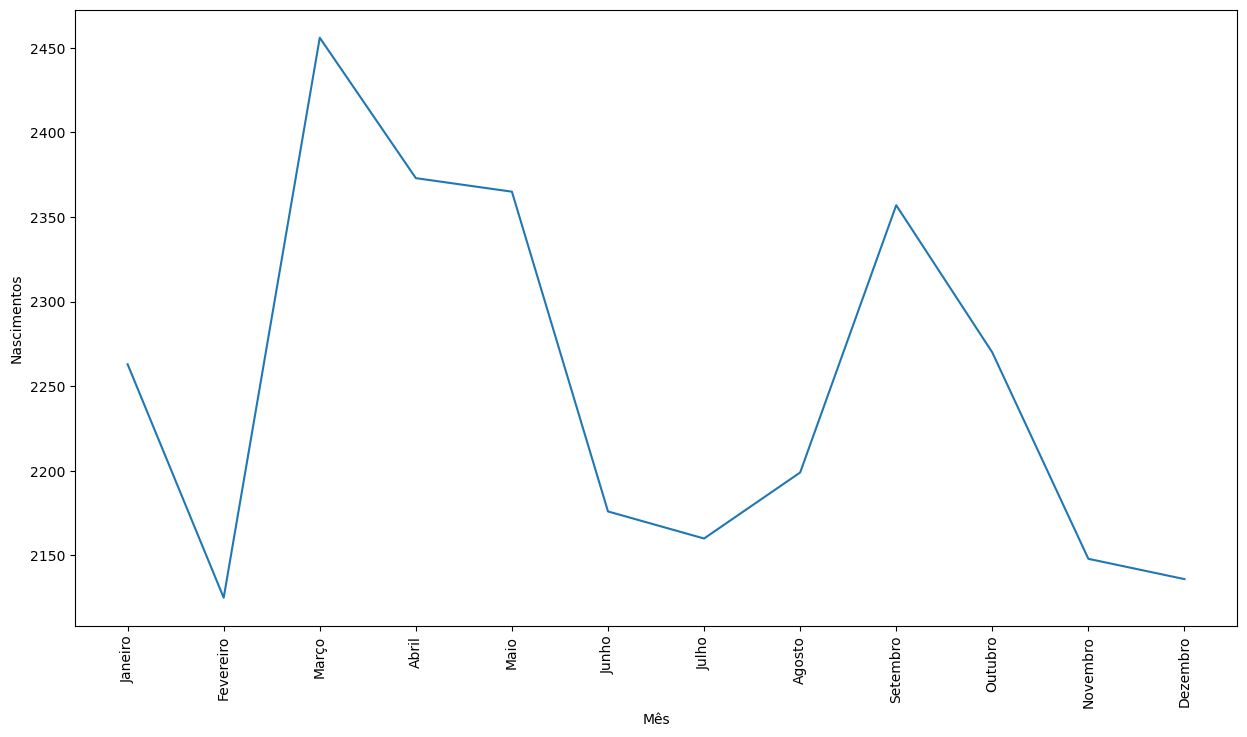

In [172]:
# Plot
ax = nascimentos_por_mes.plot(figsize=[15,8])

# Set tick positions on the x-axis
ax.set_xticks(range(len(nascimentos_por_mes.index)))

# Set tick labels on the x-axis
ax.set_xticklabels(nascimentos_por_mes.index)

# Rotate x-axis labels by 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Add a title for the x-axis
ax.set_xlabel('Mês')

# Add a title for the y-axis
ax.set_ylabel('Nascimentos')

# View 
plt.show()


In [248]:
# Birth number by "munResNome", starting from my date of birth.
outubro = sinasc_4['DTNASC'][sinasc_4['DTNASC'].dt.month == 10]
dia_mes = outubro[outubro.dt.day == 10]

dez_outubro = sinasc_4.groupby([dia_mes, 'munResNome'])['DTNASC'].count().to_frame()
dez_outubro

DTNASC
DTNASC     munResNome                      
2019-10-10 Alvorada D'Oeste               1
           Ariquemes                      4
           Buritis                        2
           Cacoal                         3
           Campo Novo de Rondônia         2
           Castanheiras                   1
           Chupinguaia                    1
           Colorado do Oeste              2
           Corumbiara                     1
           Costa Marques                  1
           Cujubim                        1
           Espigão D'Oeste                4
           Guajará-Mirim                  2
           Jaru                           1
           Ji-Paraná                      5
           Ministro Andreazza             2
           Monte Negro                    2
           Nova Mamoré                    2
           Novo Horizonte do Oeste        1
           Pimenta Bueno                  1
           Porto Velho                   22
           Rolim de Moura                 3
           Santa Luzia D'Oeste            1
           São Francisco do Guaporé       1
           Vilhena                        5

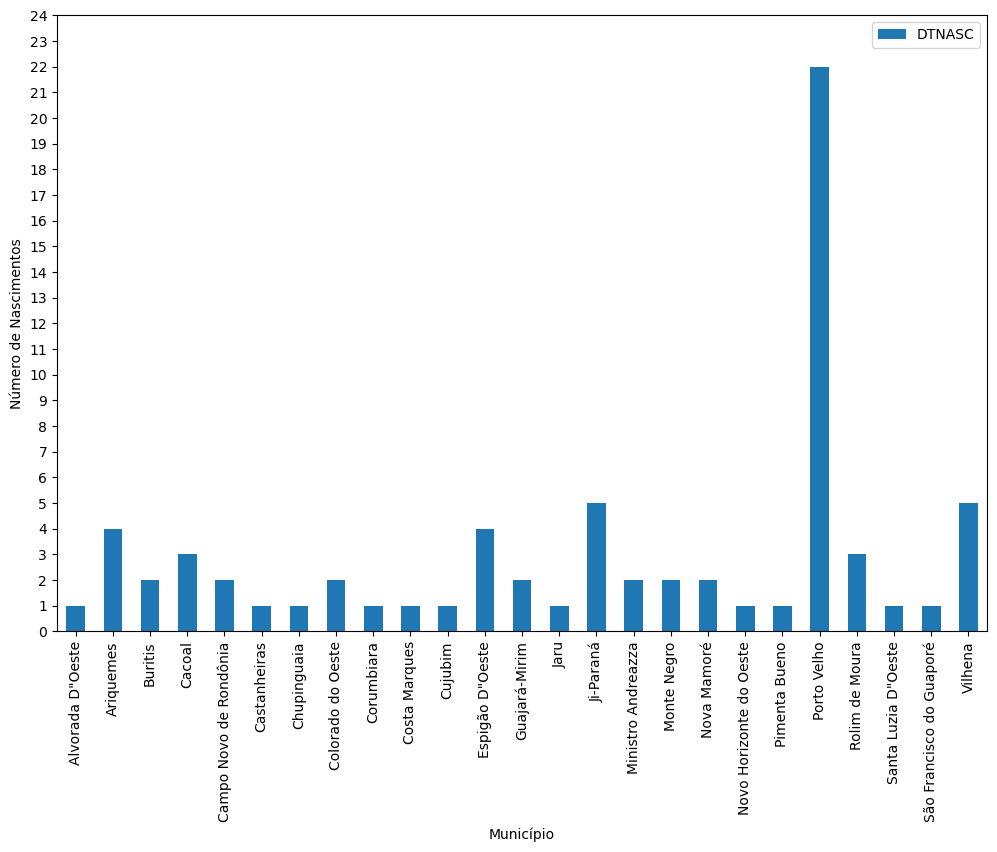

In [242]:
# Plot
ax = dez_outubro.plot(figsize=[12,8], kind = 'bar')
idx = ['Alvorada D"Oeste','Ariquemes', 'Buritis',
       'Cacoal', 'Campo Novo de Rondônia',
       'Castanheiras', 'Chupinguaia',
       'Colorado do Oeste', 'Corumbiara',
       'Costa Marques', 'Cujubim',
       'Espigão D"Oeste', 'Guajará-Mirim',
       'Jaru', 'Ji-Paraná', 'Ministro Andreazza',
       'Monte Negro', 'Nova Mamoré',
       'Novo Horizonte do Oeste',
       'Pimenta Bueno', 'Porto Velho',
       'Rolim de Moura', 'Santa Luzia D"Oeste',
       'São Francisco do Guaporé', 'Vilhena'
       ]
# Set tick positions on the x-axis
ax.set_xticks(range(len(idx)))

# Set tick labels on the x-axis
ax.set_xticklabels(idx)

# Rotate x-axis labels by 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Set tick positions on the y-axis
ax.set_yticks(range(dez_outubro.max().iloc[0] + 3))

# Set tick labels on the y-axis
ax.set_yticklabels(range(dez_outubro.max().iloc[0] + 3))

# Add a title for the x-axis
ax.set_xlabel('Município')

# Add a title for the y-axis
ax.set_ylabel('Número de Nascimentos')

# View 
plt.show()


<Axes: xlabel='RACACOR'>

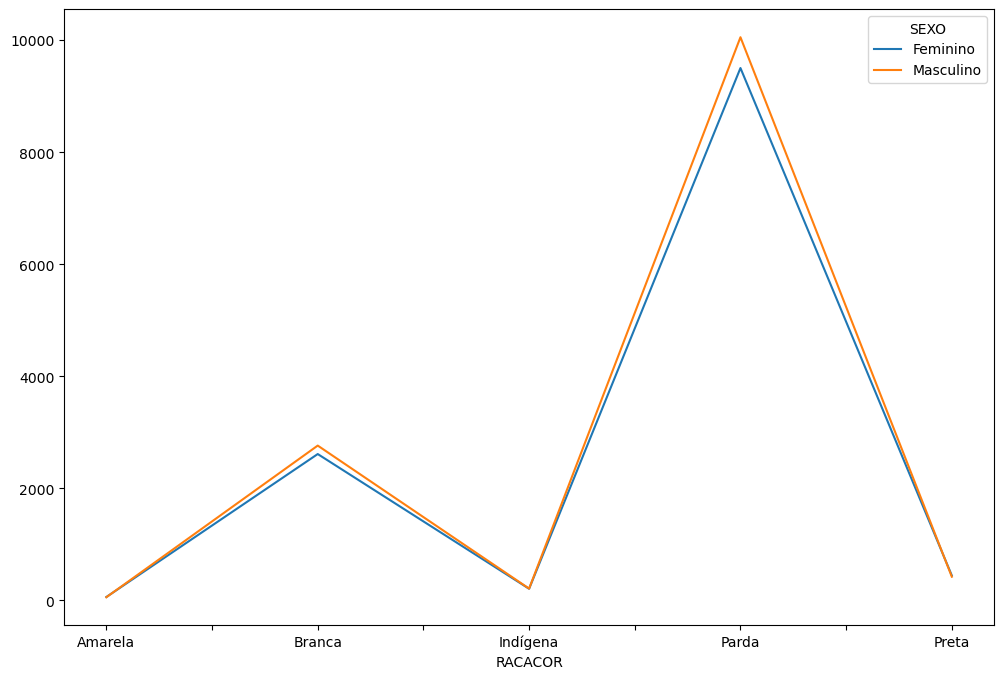

In [282]:
# Number of births by skin color and sex
sinasc_5 = sinasc_raw[['SEXO', 'RACACOR', 'PARTO']].copy()
sinasc_5.groupby(['RACACOR','SEXO'])['PARTO'].count().unstack().plot(figsize=[12,8])

In [298]:
# Checking whether the mother's education influences the baby's weight
sinasc_final = sinasc_raw[['PESO', 'SEXO', 'ESCMAE']].copy()

amostra_final = sinasc_final.groupby(['ESCMAE', 'SEXO'])['PESO'].mean().unstack()

ordem_categorias = ['1 a 3 anos', '4 a 7 anos', '8 a 11 anos', '12 anos ou mais', 'Nenhuma']
escolaridade_peso = amostra_final.loc[ordem_categorias]
escolaridade_peso


SEXO,Feminino,Masculino
ESCMAE,,
1 a 3 anos,3126.363636,3191.354386
4 a 7 anos,3158.036123,3288.963439
8 a 11 anos,3193.250588,3305.898320
12 anos ou mais,3182.427912,3309.658421
Nenhuma,2972.333333,3178.181818


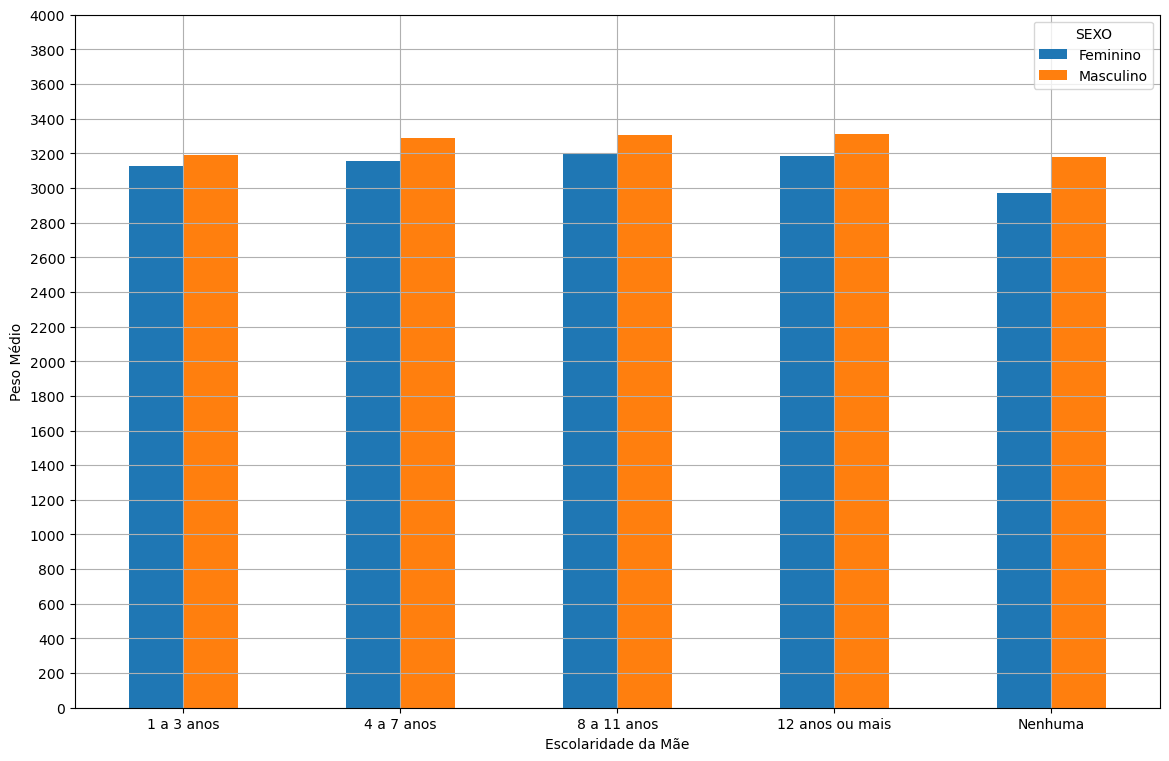

In [320]:
# Plot
ax = escolaridade_peso.plot(figsize=[14, 9], kind='bar')

ax.set_yticks(range(0,4001,200))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.grid(True)

plt.ylabel('Peso Médio')
plt.xlabel('Escolaridade da Mãe')
plt.show()

Insights dos dados acima:

- Mês com maior número de nascimentos é março com número de 2456 nascimentos.
- Os 3 maiores números de nascimentos são Março, Abril, Maio.
- Os 3 Municípios com maior número de nascimento: 1-Porto Velho,2-Ji-Paraná e Vilhena, 3- Espigão D'Oeste e Ariquemes
- O número de partos realizados na em "RACACOR" a Parda tem o maior número, seguida da Branca e Preta.
- A diferença entre o sexo Masculino e Feminino é maior em Pardos e Brancos, predominando em quantidade o sexo Masculino.
- Entre Amarela, Indígena, Preta o sexo Masculino e Feminino é quase o mesmo.
- Verificamos também como o estudo da mãe interfere no peso da criança e a falta de estudo revelam os pesos mais baixos principalmente para o sexo feminino. 